<a href="https://colab.research.google.com/github/touseefshoonya/Object-detection-using-TF/blob/main/Image_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Apr  2 04:54:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import keras

In [ ]:
keras.__version__

'2.15.0'

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/Youtube-Live/CV-hands-on

/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/Youtube-Live/CV-hands-on


In [ ]:
%pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/Youtube-Live/CV-hands-on'

In [ ]:
%ls

 cat-dog-data.zip  'Image Classification using Tensorflow.ipynb'


In [ ]:
!unzip cat-dog-data.zip

Archive:  cat-dog-data.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: trai

In [ ]:
%ls

 cat-dog-data.zip  'Image Classification using Tensorflow.ipynb'   train/   validation/


In [ ]:
# Import packages

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
%ls

 cat-dog-data.zip  'Image Classification using Tensorflow.ipynb'   train/   validation/


In [ ]:
#set constant

IMAGE_SIZE = [224,224]

train_path = "train"
valid_path = "validation"

In [ ]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [ ]:
# Donwload vgg16 pretrained model

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg16.layers:
  print(layer)

In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
folder = glob("train/*")

In [ ]:
folder

['train/Cat', 'train/Dog']

In [ ]:
len(folder)

2

In [ ]:
# Adding our custom dense layers

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

In [ ]:
## data transformation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
%ls

 cat-dog-data.zip  'Image Classification using Tensorflow.ipynb'   train/   validation/


In [ ]:
# lodaing train images

training_set = train_datagen.flow_from_directory(
    "train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 337 images belonging to 2 classes.


In [ ]:
# lodaing test images

test_set = test_datagen.flow_from_directory(
    "validation",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 59 images belonging to 2 classes.


In [ ]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)

)

Epoch 1/50
11/11 [==============================] - 13s 686ms/step - loss: 3.9458 - accuracy: 0.5608 - val_loss: 1.2852 - val_accuracy: 0.4915
Epoch 2/50
11/11 [==============================] - 5s 437ms/step - loss: 0.7604 - accuracy: 0.5668 - val_loss: 0.4748 - val_accuracy: 0.7627
Epoch 3/50
11/11 [==============================] - 5s 434ms/step - loss: 0.3377 - accuracy: 0.8546 - val_loss: 0.4011 - val_accuracy: 0.7966
Epoch 4/50
11/11 [==============================] - 5s 428ms/step - loss: 0.2218 - accuracy: 0.9080 - val_loss: 0.3789 - val_accuracy: 0.8136
Epoch 5/50
11/11 [==============================] - 5s 436ms/step - loss: 0.1682 - accuracy: 0.9525 - val_loss: 0.3864 - val_accuracy: 0.8136
Epoch 6/50
11/11 [==============================] - 5s 430ms/step - loss: 0.1381 - accuracy: 0.9644 - val_loss: 0.3797 - val_accuracy: 0.8136
Epoch 7/50
11/11 [==============================] - 5s 449ms/step - loss: 0.1067 - accuracy: 0.9674 - val_loss: 0.4361 - val_accuracy: 0.8644
Epoch

In [ ]:
history.history

{'loss': [3.9458396434783936,
  0.7603649497032166,
  0.33769461512565613,
  0.22183512151241302,
  0.16820064187049866,
  0.13810138404369354,
  0.10674174129962921,
  0.108977310359478,
  0.08976390957832336,
  0.07741627842187881,
  0.08005793392658234,
  0.04243138059973717,
  0.036698516458272934,
  0.04088383540511131,
  0.04322788119316101,
  0.029785800725221634,
  0.02568814903497696,
  0.02911178022623062,
  0.026638232171535492,
  0.014560803771018982,
  0.015341668389737606,
  0.01285717822611332,
  0.010815789923071861,
  0.011455642990767956,
  0.010338330641388893,
  0.007740609347820282,
  0.009495739825069904,
  0.011349056847393513,
  0.006942009087651968,
  0.008821035735309124,
  0.006872718222439289,
  0.00564070837572217,
  0.007262085098773241,
  0.004448801279067993,
  0.003516661934554577,
  0.004306106828153133,
  0.0032509416341781616,
  0.005609909538179636,
  0.003100085072219372,
  0.0036298225168138742,
  0.004139486234635115,
  0.0036355932243168354,
  0

In [ ]:
import matplotlib.pyplot as plt

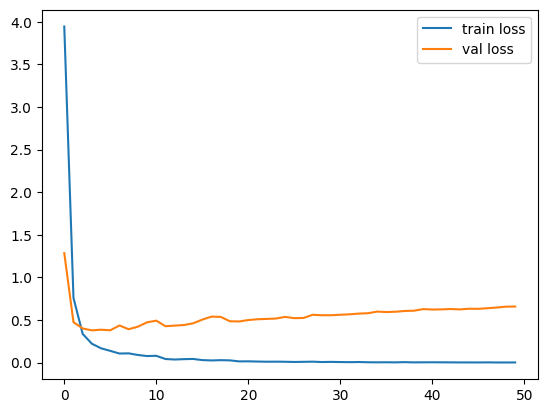

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig("Loss graph")

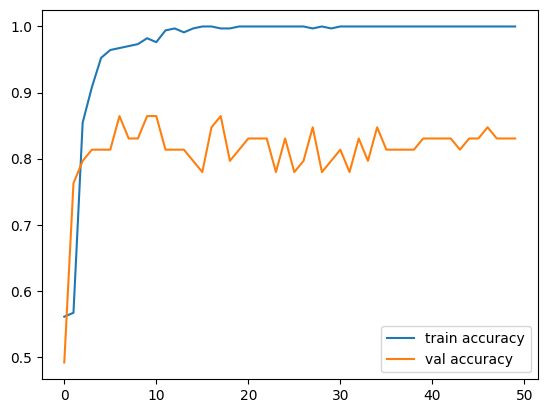

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig("accuracy graph")

In [ ]:
## Save model
model.save("model_vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load model

from tensorflow.keras.models import load_model

model=load_model('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

2/2 [==============================] - 0s 121ms/step


In [ ]:
y_pred

array([[9.91317630e-01, 8.68241955e-03],
       [1.09788104e-07, 9.99999881e-01],
       [9.96379435e-01, 3.62052745e-03],
       [9.98161376e-01, 1.83866883e-03],
       [8.48112247e-10, 1.00000000e+00],
       [3.82216007e-01, 6.17783964e-01],
       [1.01837646e-02, 9.89816189e-01],
       [8.18964317e-02, 9.18103635e-01],
       [9.46833074e-01, 5.31669222e-02],
       [7.88037121e-01, 2.11962909e-01],
       [9.97379661e-01, 2.62039783e-03],
       [5.77321392e-04, 9.99422669e-01],
       [2.75857892e-04, 9.99724090e-01],
       [1.07230962e-05, 9.99989271e-01],
       [2.41106283e-02, 9.75889325e-01],
       [9.99823749e-01, 1.76247340e-04],
       [2.99977510e-05, 9.99969959e-01],
       [2.71772896e-03, 9.97282267e-01],
       [8.97491176e-04, 9.99102592e-01],
       [3.15760326e-06, 9.99996901e-01],
       [9.99891639e-01, 1.08307649e-04],
       [4.13094554e-08, 1.00000000e+00],
       [9.99977231e-01, 2.27864984e-05],
       [9.78305757e-01, 2.16942579e-02],
       [1.629442

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
%ls

'accuracy graph.png'   dog.971.jpg                                    model_vgg16.h5
 cat.998.jpg          'Image Classification using Tensorflow.ipynb'   train/
 cat-dog-data.zip     'Loss graph.png'                                validation/


In [ ]:
## load test image

image_name = "cat.998.jpg"

In [ ]:
img = image.load_img(image_name, target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[241., 234., 242.],
        [240., 233., 241.],
        [238., 231., 239.],
        ...,
        [238., 232., 236.],
        [241., 235., 239.],
        [242., 236., 240.]],

       [[240., 233., 241.],
        [238., 231., 239.],
        [235., 228., 236.],
        ...,
        [239., 233., 237.],
        [240., 234., 238.],
        [238., 232., 236.]],

       [[241., 234., 242.],
        [240., 233., 241.],
        [238., 231., 239.],
        ...,
        [235., 229., 233.],
        [235., 229., 233.],
        [233., 227., 231.]],

       ...,

       [[240., 229., 223.],
        [238., 227., 221.],
        [236., 225., 219.],
        ...,
        [236., 229., 221.],
        [236., 229., 221.],
        [236., 229., 221.]],

       [[238., 227., 225.],
        [236., 225., 223.],
        [235., 224., 222.],
        ...,
        [237., 230., 222.],
        [236., 229., 221.],
        [236., 229., 221.]],

       [[236., 224., 224.],
        [237., 225., 225.],
        [239., 2

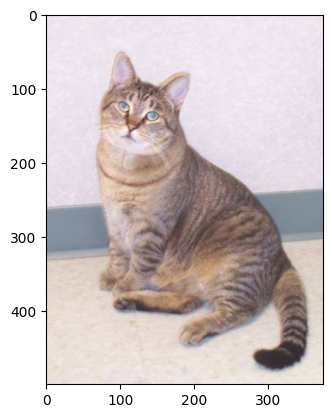

In [ ]:
Z = plt.imread(image_name)
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 19ms/step


array([[0.9735877 , 0.02641231]], dtype=float32)

In [ ]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
result

array([0])

In [ ]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
